# Modelo Support Vector Machine

### Autores: Matías Corredoira de Soto y Pablo Revuelta Stobbs

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, recall_score, roc_auc_score, plot_precision_recall_curve
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
import scikitplot as skplt

In [2]:
pathfile1 = '../data/loans_ind_clean.csv'

In [3]:
loans_ind = pd.read_csv(pathfile1, engine = 'python')
loans_ind.head()

,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,...,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_avg
0,36.0,359.26,A,6.0,OWN,153000.0,Not Verified,1.0,credit_card,Credit card refinancing,...,20,2,95.7,11.1,1,528172,100865,28100,120572,722.0
1,36.0,285.70,E,2.0,RENT,50000.0,Source Verified,1.0,debt_consolidation,Debt consolidation,...,4,0,80.0,100.0,0,7600,5588,3600,4000,687.0
2,36.0,232.79,A,7.0,MORTGAGE,110000.0,Not Verified,1.0,debt_consolidation,Debt consolidation,...,19,3,100.0,8.3,0,350617,45955,83700,32239,712.0
3,60.0,243.29,C,7.0,RENT,51979.0,Source Verified,1.0,debt_consolidation,Debt consolidation,...,15,3,100.0,0.0,2,34200,10956,18800,5500,692.0
4,36.0,492.34,C,7.0,MORTGAGE,75000.0,Verified,1.0,debt_consolidation,Debt consolidation,...,4,3,90.0,100.0,0,170591,27684,3000,30321,687.0


In [5]:
y = loans_ind['loan_status']
x = loans_ind.drop('loan_status', axis = 1)
x_list = list(x.columns)

In [6]:
numeric_transformer_0 = Pipeline(steps = [
    ('imputer_0', SimpleImputer(strategy = 'constant')),
    ('escalar', StandardScaler())
])

numeric_transformer_median = Pipeline(steps = [
    ('imputer_median', SimpleImputer(strategy = 'median')),
    ('escalar1', StandardScaler())
])

categoric_transformer  = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'sin_info')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore')) # mirar esto de handle_unknowns
])

In [7]:
numeric_features_0 = x.loc[:, ['bc_open_to_buy', 'mths_since_recent_bc', 'revol_util', 'emp_length', 'term', 'installment', 'annual_inc', 'inq_last_6mths',
                                      'mths_since_last_delinq', 'open_acc', 'revol_bal', 'total_acc', 'tot_cur_bal', 'acc_open_past_24mths',
                                       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
                                      'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_inq', 'num_actv_rev_tl',
                                       'num_sats', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'tot_hi_cred_lim',
                                      'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'fico_avg']].columns

numeric_features_median = x.loc[:, ['percent_bc_gt_75',
                                            'bc_util',
                                            'avg_cur_bal',
                                            'num_rev_accts',
                                            'dti']].columns


categoric_features = x.select_dtypes(include = ['object']).columns

In [8]:
preprocessor = ColumnTransformer(
        transformers = [
            ('num_0', numeric_transformer_0, numeric_features_0),
            ('num_median', numeric_transformer_median, numeric_features_median),
            ('cat', categoric_transformer, categoric_features)
        ]
)

In [9]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)


In [10]:
test_y.value_counts()

1.0    85984
0.0    29152
Name: loan_status, dtype: int64

In [11]:
svm = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', SVC(max_iter = 1000))
                    ])

In [11]:
%%time

svm.fit(train_x, train_y)

C:\Users\Pablo\anaconda3\envs\loan_env\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Wall time: 4min 55s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_0',
                                                  Pipeline(steps=[('imputer_0',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('escalar',
                                                                   StandardScaler())]),
                                                  Index(['bc_open_to_buy', 'mths_since_recent_bc', 'revol_util', 'emp_length',
       'term', 'installment', 'annual_inc', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'revol_bal', 'total_ac...
                                                  Index(['percent_bc_gt_75', 'bc_util', 'avg_cur_bal', 'num_rev_accts', 'dti'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                 

In [12]:
print("model score: %.3f" % svm.score(test_x, test_y))

model score: 0.453


In [14]:
pred_y = svm.predict(test_x)

In [32]:
filename = 'model_svm.sav'

In [33]:
pickle.dump(svm, open(filename, 'wb'))

In [12]:
svm =  pickle.load(open('../modelos/model_svm.sav', 'rb'))

# Análisis

In [17]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.23      0.48      0.31     29152
         1.0       0.72      0.44      0.55     85984

    accuracy                           0.45    115136
   macro avg       0.47      0.46      0.43    115136
weighted avg       0.59      0.45      0.49    115136



## Matriz de confusión

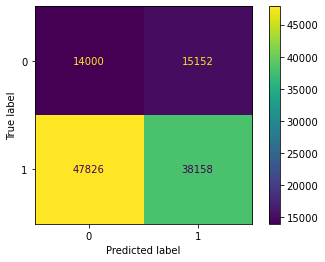

In [30]:
confusion_matrix = confusion_matrix(test_y, pred_y)
ConfusionMatrixDisplay(confusion_matrix).plot()

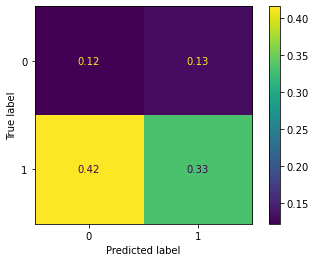

In [19]:
ConfusionMatrixDisplay(confusion_matrix/np.sum(confusion_matrix)).plot()

El modelo SVM actua en contraposición al resto de modelos, ya que falla mucho a la hora de predecir la clase 1, sin embargo, se observa que su predicción para la clase 0 tampoco es óptima, sin embargo es mejora a la del resto de modelos.

## Curva ROC 

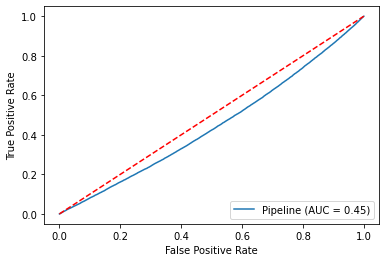

In [23]:
metrics.plot_roc_curve(svm, test_x, test_y)
plt.plot([0, 1], [0, 1], 'r--')

La curva ROC muestra que el modelo se encuentra por debajo de la diagonal, lo que indica un muy mal resultado.

## Precission Recall

In [25]:
precision, recall, thresholds = precision_recall_curve(test_y, pred_y)

area = auc(recall, precision)

print('------------ Results for SVM ---------------')
print('recall_score:', recall_score(test_y, pred_y))
print('roc_auc_score:',roc_auc_score(test_y, pred_y))
print("Area Under P-R Curve: ",area)

------------ Results for SVM ---------------
recall_score: 0.44378023818384815
roc_auc_score: 0.46201086552441584
Area Under P-R Curve:  0.7874714552992566


El modelo SVM no tiene un buen rendimiento sobre el dataset a la hora de predecir, se observa un bajo auc y un recall por debajo del 50 %, por lo que se puede indicar que no es la mejor opción para el modelo predictivo.

# Modelo joint loan

In [1]:
pathfile1 = '../data/loans_joint_clean.csv'

In [4]:
loans_joint = pd.read_csv(pathfile1, engine = 'python')
loans_joint.head()

,Unnamed: 0,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,fico_avg
0,0,36.0,486.98,B,3.0,MORTGAGE,115000.0,Not Verified,1.0,car,...,Jul-1995,0.0,2.0,8.0,7.7,0.0,27.0,0.0,0.0,682.0
1,1,36.0,112.83,B,3.0,MORTGAGE,40000.0,Verified,1.0,debt_consolidation,...,Jan-2007,0.0,2.0,18.0,50.0,3.0,20.0,0.0,0.0,672.0
2,2,36.0,285.70,E,1.0,RENT,24000.0,Not Verified,0.0,other,...,Sep-2005,0.0,0.0,23.0,NaN,23.0,2.0,1.0,3.0,662.0
3,3,60.0,437.92,C,5.0,MORTGAGE,55000.0,Source Verified,1.0,home_improvement,...,Jun-2006,2.0,3.0,23.0,42.1,13.0,13.0,0.0,2.0,697.0
4,4,36.0,817.41,B,NaN,MORTGAGE,32000.0,Verified,0.0,credit_card,...,Oct-1997,0.0,2.0,14.0,76.1,2.0,24.0,0.0,0.0,692.0


In [5]:
y_joint = loans_joint['loan_status']
x_joint = loans_joint.drop('loan_status', axis = 1)

In [6]:
numeric_transformer_0_joint = Pipeline(steps = [
    ('imputer_0_joint', SimpleImputer(strategy = 'constant')),
    ('escalar_joint', StandardScaler())
])


categoric_transformer_joint  = Pipeline(steps = [
    ('imputer_joint', SimpleImputer(strategy = 'constant', fill_value = 'sin_info')),
    ('onehot_joint', OneHotEncoder(handle_unknown = 'ignore')) # mirar esto de handle_unknowns
])

In [7]:
numeric_features_0_joint = x_joint.select_dtypes(include=['int64', 'float64']).columns

categoric_features_joint = x_joint.select_dtypes(include = ['object']).columns

In [8]:
preprocessor_joint = ColumnTransformer(
        transformers = [
            ('num_0_joint', numeric_transformer_0_joint, numeric_features_0_joint),
            ('cat_joint', categoric_transformer_joint, categoric_features_joint)
        ]
)

In [9]:
from sklearn.model_selection import train_test_split

train_x_joint, test_x_joint, train_y_joint, test_y_joint = train_test_split(x_joint,
                                                    y_joint,
                                                    test_size = 0.25,
                                                    random_state = 42)


In [10]:
svm_joint = Pipeline(steps=[('preprocessor_joint', preprocessor_joint),
                     ('classifier_joint', SVC(max_iter = 1000))
                    ])

In [11]:
%%time

svm_joint.fit(train_x_joint, train_y_joint)

C:\Users\Pablo\anaconda3\envs\loan_env\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Wall time: 350 ms


Pipeline(steps=[('preprocessor_joint',
                 ColumnTransformer(transformers=[('num_0_joint',
                                                  Pipeline(steps=[('imputer_0_joint',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('escalar_joint',
                                                                   StandardScaler())]),
                                                  Index(['Unnamed: 0', 'term', 'installment', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc',
       'pub_rec', 'revol_b...
                                                                   SimpleImputer(fill_value='sin_info',
                                                                                 strategy='constant')),
                                                                  ('onehot_joint',
      

In [12]:
print("model score: %.3f" % svm_joint.score(test_x_joint, test_y_joint))

model score: 0.630


In [13]:
filename_joint = 'model_svm_joint.sav'

In [14]:
pickle.dump(svm_joint, open(filename_joint, 'wb'))